In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
X,y=load_iris(return_X_y=True,as_frame=True)

I will define what is leakage and how to avoid it.

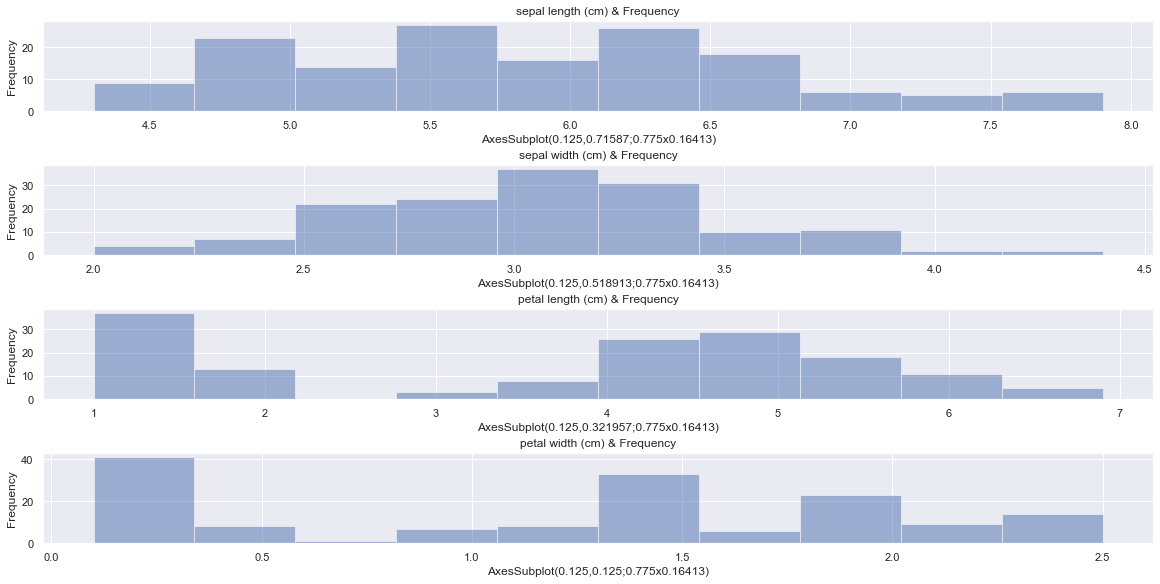

In [4]:
fig,ax=plt.subplots(len(X.columns),1,constrained_layout=True,figsize=(16,8))
for _,_1 in zip(X.select_dtypes(['int','float']).columns,ax):
    _1.hist(X[_],alpha=0.5)
    _1.set_xlabel(_1)
    _1.set_ylabel('Frequency')
    _1.set_title(f"{_} & Frequency")

First :
width and length of petal and sepal are in different ranges ,i am going to scale it now 

so few outliers ,i am going to scale it using Robust Scaler which substract the Median from the value then divide it by IQR ,it reduce impact of Outliers

# The Wrong Way

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [6]:
KNN=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [7]:
Scale=RobustScaler()

In [8]:
X_Scale=Scale.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_Scale,y,random_state=0)

In [10]:
from sklearn.model_selection import KFold

In [11]:
Cross_validation=KFold(n_splits=5,shuffle=True,random_state=0)

In [12]:
tr_cv=[]
for train,cv in Cross_validation.split(X_train):
    xtrain ,xcv = X_train[train] ,X_train[cv] 
    ytrain ,ycv = y_train.iloc[train] ,y_train.iloc[cv] 
    KNN.fit(xtrain,ytrain)
    tr_cv.append((KNN.score(xtrain,ytrain),KNN.score(xcv,ycv)))

In [13]:
tr_cv

[(0.9662921348314607, 0.9565217391304348),
 (0.9775280898876404, 0.9565217391304348),
 (0.9555555555555556, 0.9090909090909091),
 (0.9555555555555556, 0.9090909090909091),
 (0.9555555555555556, 0.9545454545454546)]

In [14]:
cv = 0
tr = 0
for _ in tr_cv:
    cv+=_[1]
    tr+=_[0]

In [15]:
tr/5

0.9620973782771536

In [16]:
cv/5

0.9371541501976285

In [17]:
KNN.score(X_test,y_test)

0.9210526315789473

This Over Optimistic Performance and Wrong Solution

# The Right Way

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

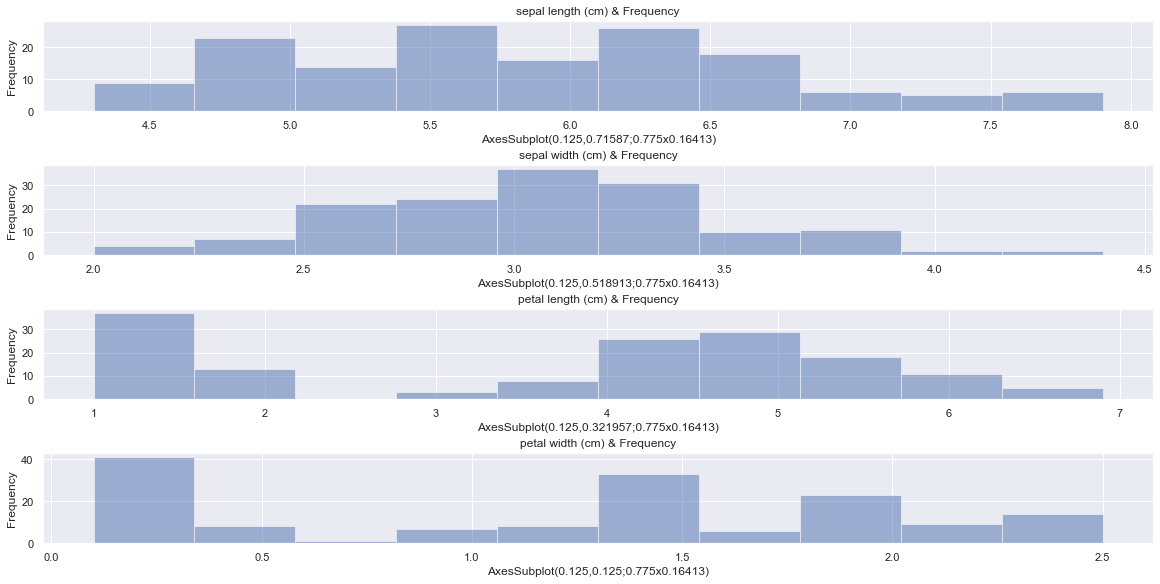

In [19]:
fig,ax=plt.subplots(len(X_train.columns),1,constrained_layout=True,figsize=(16,8))
for _,_1 in zip(X_train.select_dtypes(['int','float']).columns,ax):
    _1.hist(X[_],alpha=0.5)
    _1.set_xlabel(_1)
    _1.set_ylabel('Frequency')
    _1.set_title(f"{_} & Frequency")

In [20]:
KNN=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
Scale=RobustScaler()
tr_cv=[]
for train,cv in Cross_validation.split(X_train):
    xtrain ,xcv = X_train.iloc[train] ,X_train.iloc[cv] 
    ytrain ,ycv = y_train.iloc[train] ,y_train.iloc[cv] 
    xtrain_scale=Scale.fit_transform(xtrain)
    xcv_scale=Scale.transform(xcv)
    KNN.fit(xtrain_scale,ytrain)
    tr_cv.append((KNN.score(xtrain_scale,ytrain),KNN.score(xcv_scale,ycv)))

In [21]:
cv = 0
tr = 0
for _ in tr_cv:
    cv+=_[1]
    tr+=_[0]

In [22]:
tr/5

0.9598501872659175

In [23]:
cv/5

0.9375494071146246

In [24]:
KNN.score(Scale.transform(X_test),y_test)

0.9210526315789473

Compare Results 

| Train | Cross Validation | Testing |
|-----------------|-----------------|-----------------|
| 0.9620973782771536 | 0.9371541501976285 | 0.9210526315789473 |
| 0.9598501872659175 | 0.9375494071146246 | 0.8947368421052632 |


The real performance of our model on the test dataset is 0.894, which is significantly lower than 0.921.

# Note :
When Using KNN First of All you should scaling your Features because when calculating distance the feature with higher range will dominate on calculating the distance and it will lead to misleading results

it also makes the learning process and tuning hyperparameters faster

In [25]:
# Task to do 
## try to split data and scaling traing ,cross validation ,test with their own parameters and compare result to my results
## tuning hyperparameters of my right model and your model and see if you improve performance significantly or not 